In [ ]:
#@title Import Libaries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [ ]:
#@title Input Parameters for Hypothesis Test
pop_size = int(input("Input size for two populations:     "))
mean1 = float(input("Input mean for Population 1:     "))
std1 = float(input("Input standard deviation for Population 1:     "))
mean2 = float(input("Input mean for Population 2:     "))
std2 = float(input("Input standard deviation for Population 2:     "))
samp_size = int(input("Input size for two samples:     "))

Input size for two populations:     15000
Input mean for Population 1:     5
Input standard deviation for Population 1:     10
Input mean for Population 2:     8
Input standard deviation for Population 2:     10
Input size for two samples:     45


# **Two Populations with Normal Distribution**

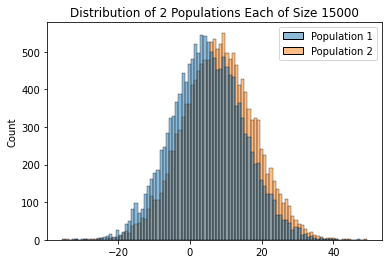

In [ ]:
#@title
populations = np.transpose([np.random.normal(mean1, std1, pop_size), np.random.normal(mean2, std2, pop_size)])
df_pop = pd.DataFrame(data=populations, columns=['Population 1', 'Population 2'])
pop_chart = sns.histplot(data=df_pop).set_title(f"Distribution of 2 Populations Each of Size {pop_size}")

# **Two Samples Taken from Each of the Larger Populations**

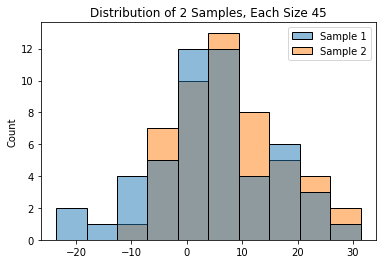

In [ ]:
#@title 
samples = np.transpose([np.random.choice(populations[:,0], size=50), np.random.choice(populations[:,1], size=50)])

df_sample = pd.DataFrame(data=samples, columns=['Sample 1', 'Sample 2'])

sample_mean1 = np.mean(samples[:, 0])
sample_std1 = np.std(samples[:, 0])
sample_mean2 = np.mean(samples[:, 1])
sample_std2 = np.std(samples[:, 1])
samp_chart = sns.histplot(data=df_sample).set(title=f"Distribution of 2 Samples, Each Size {samp_size}")

In [ ]:
#@title Compare sample from results and test null hypothesis that populations have same mean
test_stat = np.abs((sample_mean1 - sample_mean2) / np.sqrt((sample_std1/len(samples[:, 0])) + (sample_std2/len(samples[:, 1]))))
print("Mean of sample 1 is {:.4f}".format(sample_mean1))
print("Mean of sample 2 is {:.4f}".format(sample_mean2))
print("Standard deviation of sample 1 is {:.4f}".format(sample_std1))
print("Standard deviation of sample 2 is {:.4f}".format(sample_std2))
print("\nThe test statistic is {:.4f}\n".format(test_stat))
critical_99 = scipy.stats.norm.ppf(.995)
critical_95 = scipy.stats.norm.ppf(.975)
print("The 99pct (two-tailed) critical value is {:.4f}".format(critical_99))
if test_stat > critical_99:
  print("Reject null hypothesis with 99% confidence. That is reject that means are from same population\n")
else:
  print("Accept null hypothesis with 99% confidence. That is cannot say that means are from different populations\n")
print("The 95pct (two-tailed) critical value is {:.4f}".format(critical_95))
if test_stat > critical_95:
  print("Reject null hypothesis with 95% confidence. That is reject that means are from same population")
else:
  print("Accept null hypothesis with 95% confidence. That is cannot say that means are from different populations")

Mean of sample 1 is 4.0668
Mean of sample 2 is 7.5643
Standard deviation of sample 1 is 11.2499
Standard deviation of sample 2 is 9.5158

The test statistic is 5.4271

The 99pct (two-tailed) critical value is 2.5758
Reject null hypothesis with 99% confidence. That is reject that means are from same population

The 95pct (two-tailed) critical value is 1.9600
Reject null hypothesis with 95% confidence. That is reject that means are from same population
